# Python API Homework - Observations

1. The temperature close to the equator is indeed warmer than as we get further from the equator
2. Wind speeds are showing more random points of data as we get further from the equator
3. Humidity close to the equator is showing a tighter grouping; as we get closer to 20 degrees north/south, the humidity percentages show more randomness 


**Additional question to ask - what would the relationship of temp, clouds, humidity, etc look like if we added altitude to the dataframe and reviewed that by scatterplot. My hypothesis to be tested would be: If altitude is related to all variables, I would expect to see varying degrees of temperature, wind, cloud cover and humidity at higher altitudes.

# WeatherPy
----
# Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import random


# Import API key
from api_keys import api_key

# API Key
api_key = '8e66be58d9573c324588a63b2727e090'
settings = {"units": "imperial", "appid": api_key}
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&q='

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

595


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
town = []

for i in cities:
    try:
        response = requests.get(url + i + '&APPID= + api_key).json()
        weather_dict = {'City': response['name'], 'Date': response['dt'], 'Humidity': response['main']['humidity'],
                    'Latitude': response['coord']['lat'], 'Longitude': response['coord']['lon'],
                    'Temperature': response['main']['temp_max'], 'Wind': response['wind']['speed'],
                    'Cloud Cover': response['clouds']['all']}
        time.sleep(0.5)
        town.append(weather_dict)
        
    except:
        print(f'Results not found')
        
print(len(town))

Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results not found
Results no

In [22]:
#Create dataframe
climate_df = pd.DataFrame(town)
climate_df = climate_df.sort_values(['Humidity'], ascending=False)
climate_df.to_csv(r'../cities.csv')
climate_df

,City,Date,Humidity,Latitude,Longitude,Temperature,Wind,Cloud Cover
483,Puerto Narino,1571617938,100,-3.77,-70.38,77.00,2.24,20
157,Saint George,1571617627,100,39.45,22.34,57.20,1.36,0
141,Platanos,1571617609,100,35.47,23.60,71.01,13.94,20
340,Moose Factory,1571617802,100,51.26,-80.61,46.40,5.82,90
33,Mahebourg,1571617506,100,-20.41,57.70,71.01,5.82,75
...,...,...,...,...,...,...,...,...
175,Alice Springs,1571617645,13,-23.70,133.88,73.40,14.99,0
305,Yulara,1571617769,11,-25.24,130.99,78.80,18.34,92
178,Mount Isa,1571617648,10,-20.73,139.49,84.20,14.99,0
281,Camp Verde,1571617747,9,34.56,-111.85,72.00,9.17,1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

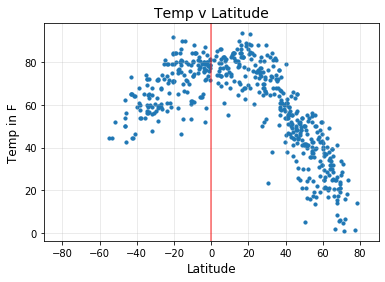

In [7]:
plt.scatter(climate_df['Latitude'],climate_df['Temperature'],s=10)
plt.title('Temp v Latitude', fontsize=14)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Temp in F',fontsize=12)
#plt.vlines(0,-50,150,colors="r",)
plt.axvline(x=0,c="r",alpha=0.6)
plt.xlim(-90,90)
plt.grid(alpha=0.3)
plt.savefig('../temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

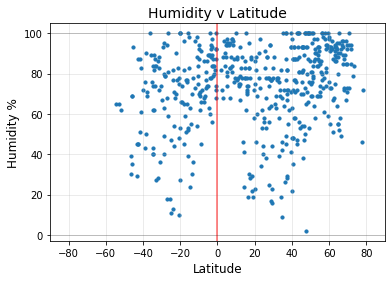

In [8]:
plt.scatter(climate_df['Latitude'],climate_df['Humidity'],s=10)
plt.title('Humidity v Latitude', fontsize=14)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity %',fontsize=12)
#plt.vlines(0,-50,150,colors="r",)
plt.axvline(x=0,c="r",alpha=0.6)
plt.axhline(100, c="k",alpha=0.2,lw=1)
plt.axhline(0, c="k",alpha=0.2,lw=1)
plt.xlim(-90,90)
plt.grid(alpha=0.3)
plt.savefig('../humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

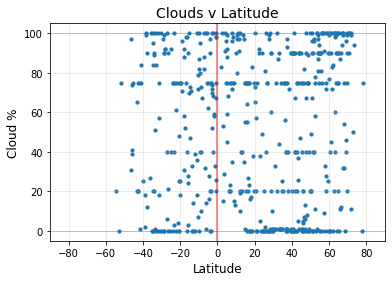

In [9]:
plt.scatter(climate_df['Latitude'],climate_df['Cloud Cover'],s=10)
plt.title('Clouds v Latitude', fontsize=14)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloud %',fontsize=12)
#plt.vlines(0,-50,150,colors="r",)
plt.axvline(x=0,c="r",alpha=0.6)
plt.axhline(100, c="k",alpha=0.2,lw=1)
plt.axhline(0, c="k",alpha=0.2,lw=1)
plt.xlim(-90,90)
plt.ylim(-5,105)
plt.grid(alpha=0.3)
plt.savefig('../clouds.png')
plt.show()

#### Latitude vs. Wind Speed Plot

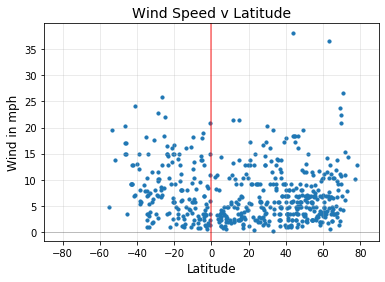

In [10]:
plt.scatter(climate_df['Latitude'],climate_df['Wind'],s=10)
plt.title('Wind Speed v Latitude', fontsize=14)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind in mph',fontsize=12)
#plt.vlines(0,-50,150,colors="r",)
plt.axvline(x=0,c='r',alpha=0.6)
plt.axhline(0, c='k',alpha=0.2,lw=1)
plt.xlim(-90,90)
plt.grid(alpha=0.3)
plt.savefig('../wind.png')
plt.show()